In [51]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data import

In [56]:
new = pd.read_csv(r"C:\Users\shubh\Desktop\Machine Learning\WORLD UNIVERSITY RANKINGS.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'

new

,World Rank,Institution,Location,National Rank,Education Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,2,7,96.7
2,3,Stanford University,USA,3,11,4,3,2,95.1
3,4,University of Cambridge,United Kingdom,1,3,25,4,10,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
...,...,...,...,...,...,...,...,...,...
1995,1996,Bharathidasan University,India,66,-,-,-,1921,65.8
1996,1997,Federal University of Maranhão,Brazil,56,-,-,-,1923,65.7
1997,1998,Jiangxi University of Finance and Economics,China,302,-,797,-,1948,65.7
1998,1999,University of Tarapacá,Chile,16,-,-,-,1925,65.7


# Data type

In [57]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   int64  
 1   Institution         2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Education Rank      2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 140.8+ KB


# Univariate Analysis

In [54]:
new.describe()

,balance,income,target
count,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.033300
std,483.714985,13336.639563,0.179428
min,0.000000,771.967729,0.000000
25%,481.731105,21340.462905,0.000000
50%,823.636973,34552.644800,0.000000
75%,1166.308387,43807.729275,0.000000
max,2654.322576,73554.233500,1.000000


#  EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

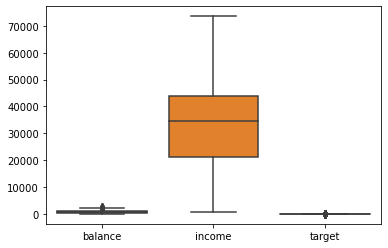

In [55]:
sns.boxplot(data=new)

# Winsorizing Technique -- Treatment of Outlier

In [31]:
q1 = new['GRE Score'].quantile(0.25)
q3 = new['GRE Score'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

350.5

In [32]:
new['GRE Score']=np.where(new['GRE Score'] > upper_limit,upper_limit,new['GRE Score']) # upper limit

<AxesSubplot:>

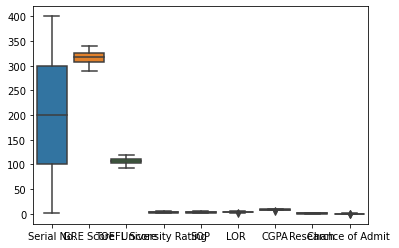

In [33]:
sns.boxplot(data=new)

In [34]:
q1 = new['TOEFL Score'].quantile(0.25)
q3 = new['TOEFL Score'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

125.5

In [35]:
new['TOEFL Score']=np.where(new['TOEFL Score'] > upper_limit,upper_limit,new['TOEFL Score']) # upper limit

<AxesSubplot:>

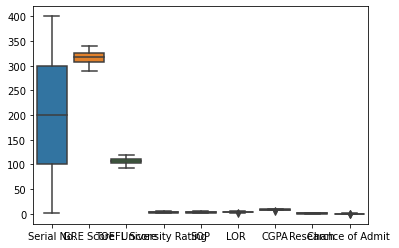

In [36]:
sns.boxplot(data=new)

In [37]:
q1 = new['University Rating'].quantile(0.25)
q3 = new['University Rating'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

7.0

In [38]:
new['University Rating']=np.where(new['University Rating'] > upper_limit,upper_limit,new['University Rating']) # upper limit

<AxesSubplot:>

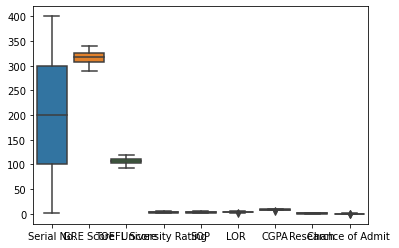

In [39]:
sns.boxplot(data=new)

In [40]:
q1 = new['SOP'].quantile(0.25)
q3 = new['SOP'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

6.25

In [41]:
new['SOP']=np.where(new['SOP'] > upper_limit,upper_limit,new['SOP']) # upper limit

<AxesSubplot:>

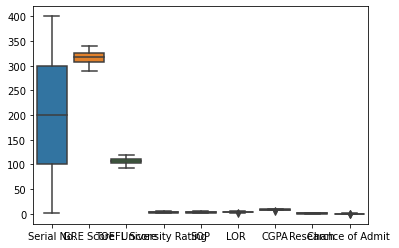

In [42]:
sns.boxplot(data=new)

In [49]:
sns.boxplot(y = 'LOR' ,data=new)

ValueError: Could not interpret input 'LOR'

In [43]:
q1 = new['LOR'].quantile(0.25)
q3 = new['LOR'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

KeyError: 'LOR'

In [ ]:
new['LOR']=np.where(new['LOR'] > upper_limit,upper_limit,new['LOR']) # upper limit

In [ ]:
sns.boxplot(data=new)

In [ ]:
q1 = new['VeryActiveDistance'].quantile(0.25)
q3 = new['VeryActiveDistance'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

In [ ]:
new['VeryActiveDistance']=np.where(new['VeryActiveDistance'] > upper_limit,upper_limit,new['VeryActiveDistance']) # upper limit

In [ ]:
sns.boxplot(data=new)

In [ ]:
new['VeryActiveDistance']=np.where(new['VeryActiveDistance'] > upper_limit,upper_limit,new['VeryActiveDistance']) # upper limit

In [ ]:
q1 = new['ModeratelyActiveDistance'].quantile(0.25)
q3 = new['ModeratelyActiveDistance'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

In [ ]:
new.head()